In [1]:
import numpy as np     #To perform numerical observations
import pandas as pd    #To work with dataframes

#For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To perform operations with date & time
import datetime as dt

In [2]:
#Importing the data
udemy=pd.read_csv('udemy.csv')

# Exploratory Data Analysis

In [3]:
udemy.head()

,Title,Url,Created_on,Published,Subscribers,Reviews,Rating,Price,Discounted_Price
0,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,589105,180491,4.64928,8640,360
1,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,683343,129964,4.55240,8640,360
2,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,414247,127686,4.58001,8640,360
3,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,1078402,310816,4.56345,8640,360
4,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,493389,121070,4.56419,8640,360


In [4]:
udemy.tail()

,Title,Url,Created_on,Published,Subscribers,Reviews,Rating,Price,Discounted_Price
9995,JavaScript Game Exercise built from scratch Ca...,/course/javascript-game-exercise/,2018-04-12T16:52:20Z,2018-04-13T15:54:33Z,1609,8,4.48069,8640,360
9996,Learn Data Science with Python - Part 1: Pytho...,/course/learn-data-science-with-python-part-1-...,2019-08-05T19:16:26Z,2019-08-28T22:10:07Z,29,8,4.09243,1920,360
9997,Natural Language Apps & Interactive Chatbots w...,/course/natural-language-apps-interactive-chat...,2019-04-17T07:44:12Z,2019-04-18T15:01:15Z,43,8,2.58979,8640,360
9998,Google Assistant development with Java & Sprin...,/course/build-a-google-assistant-app-using-jav...,2020-04-08T16:42:17Z,2020-04-14T22:17:44Z,35,8,4.72260,7680,360
9999,WebAssembly Beginner to Advanced 2020,/course/webassembly/,2020-03-31T18:41:29Z,2020-04-09T23:25:34Z,81,8,3.97139,8640,360


In [5]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10000 non-null  object 
 1    Url               10000 non-null  object 
 2    Created_on        10000 non-null  object 
 3    Published         10000 non-null  object 
 4    Subscribers       10000 non-null  int64  
 5    Reviews           10000 non-null  int64  
 6    Rating            10000 non-null  float64
 7    Price             10000 non-null  int64  
 8    Discounted_Price  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


There are 9 features and 10000 obervations.There are 4 quantitative features and 5 categorical feature.There are no missing values.

Since, Discount_Price ideally should be a numeric value, we need to change its datatype.

In [6]:
print(udemy.columns)

Index(['Title', ' Url', ' Created_on', ' Published', ' Subscribers',
       ' Reviews', ' Rating', ' Price', ' Discounted_Price'],
      dtype='object')


In [7]:
udemy = udemy.rename(columns = {' Url':'Url',' Created_on':'Created_on', ' Published':'Published', ' Subscribers':'Subscribers',' Reviews':'Reviews', ' Rating':'Rating', ' Price':'Price', ' Discounted_Price':'Discounted_Price'})


In [8]:
discount_list=list(udemy.Discounted_Price.unique())
print(discount_list)

['360', '370', '380', '365', '385', 'None', '375', '395', '700', '1600', '400', '560', '1760', '800', '3200', '1280', '2880', '1520', '2400', '480', '3120', '720', '1680', '1920', '880', '640', '960', '1120', '1360', '1440', '2320', '2800', '1200']


We can see that the values are in str datatype, and due to presence of None we can't change its datatype directly.

In [9]:
udemy['Discounted_Price'].replace('None', '0', inplace=True) #Replacing None with 0

In [10]:
# Changing datatype from object to int64
udemy['Discounted_Price'] = np.dtype('int64').type(udemy['Discounted_Price'])

In [11]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             10000 non-null  object 
 1   Url               10000 non-null  object 
 2   Created_on        10000 non-null  object 
 3   Published         10000 non-null  object 
 4   Subscribers       10000 non-null  int64  
 5   Reviews           10000 non-null  int64  
 6   Rating            10000 non-null  float64
 7   Price             10000 non-null  int64  
 8   Discounted_Price  10000 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB


In [12]:
udemy.describe()

,Subscribers,Reviews,Rating,Price,Discounted_Price
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000
mean,7.318643e+03,673.952800,4.051049,5267.968000,367.86950
std,2.549976e+04,5370.766997,0.526324,3110.644197,173.19666
min,1.800000e+01,8.000000,1.332520,1280.000000,0.00000
25%,3.737500e+02,23.000000,3.770620,1600.000000,360.00000
50%,1.707000e+03,59.000000,4.158145,6080.000000,360.00000
75%,5.603750e+03,208.000000,4.436117,8640.000000,360.00000
max,1.078402e+06,310816.000000,5.000000,12800.000000,3200.00000


In [13]:
miss_val_per=udemy.isnull().mean()*100
print(miss_val_per)

Title               0.0
Url                 0.0
Created_on          0.0
Published           0.0
Subscribers         0.0
Reviews             0.0
Rating              0.0
Price               0.0
Discounted_Price    0.0
dtype: float64


In [14]:
row, columns = udemy.shape
print("Data Row:", row)
print("Data Columns:", columns)

Data Row: 10000
Data Columns: 9


In [15]:
udemy.describe(include='O')

,Title,Url,Created_on,Published
count,10000,10000,10000,10000
unique,9719,9757,9755,9756
top,Build Responsive Real World Websites with HTML...,/course/basicsofr/,2018-11-07T17:15:49Z,2018-03-05T21:20:23Z
freq,3,2,2,2


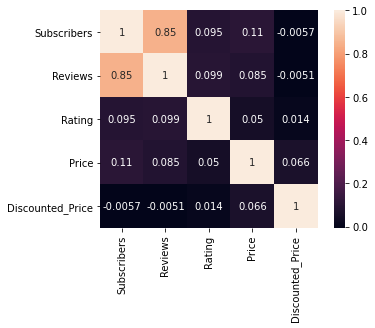

In [16]:
sns.heatmap(udemy.corr(),annot=True,square=True)

We can interpret that Reviews and Subscribers are positively correlated.

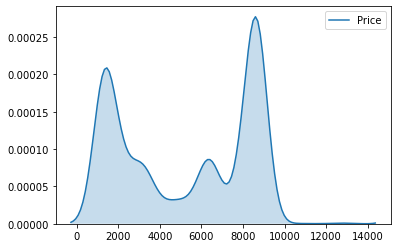

In [17]:
sns.kdeplot(data=udemy['Price'], label='Price', shade=True)

In [18]:
top_subs = udemy[['Title','Subscribers']].sort_values(by='Subscribers', ascending=False).head(10)
print(top_subs)

                                                Title  Subscribers
3   2020 Complete Python Bootcamp: From Zero to He...      1078402
1   Machine Learning A-Z™: Hands-On Python & R In ...       683343
11  Automate the Boring Stuff with Python Programming       658462
0                          The Web Developer Bootcamp       589105
4   Java Programming Masterclass for Software Deve...       493389
56  The Complete Python 3 Course: Beginner to Adva...       462390
2         Angular - The Complete Guide (2020 Edition)       414247
6   Python for Data Science and Machine Learning B...       379836
9                 Complete C# Unity Game Developer 2D       361310
7   The Complete JavaScript Course 2020: Build Rea...       340221


Text(0.5, 1.0, 'POPULAR COURSES ACCORDING TO SUBSCIPTION')

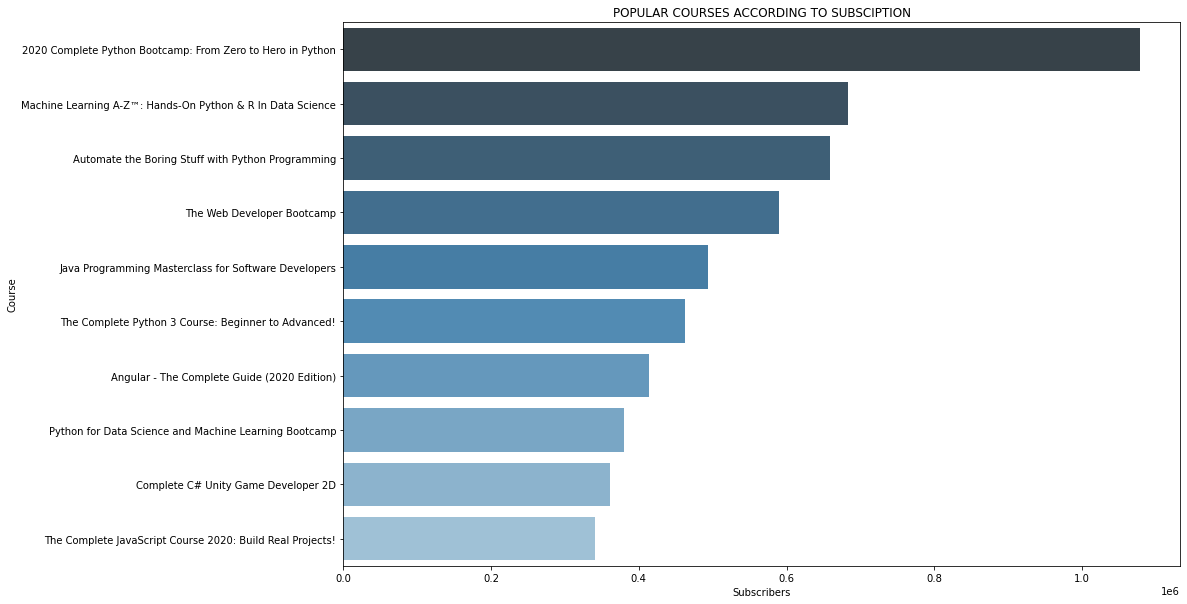

In [19]:
y=top_subs['Title'].values
x=top_subs['Subscribers'].values
plt.figure(figsize=(15,10))
sns.barplot(x,y,palette='Blues_d')
plt.xlabel('Subscribers')
plt.ylabel('Course')
plt.title('POPULAR COURSES ACCORDING TO SUBSCIPTION')

In [20]:
top_reviews = udemy[['Title','Reviews']].sort_values(by='Reviews', ascending=False).head(10)
print(top_reviews)

                                               Title  Reviews
3  2020 Complete Python Bootcamp: From Zero to He...   310816
0                         The Web Developer Bootcamp   180491
1  Machine Learning A-Z™: Hands-On Python & R In ...   129964
2        Angular - The Complete Guide (2020 Edition)   127686
4  Java Programming Masterclass for Software Deve...   121070
5  React - The Complete Guide (incl Hooks React R...    87677
6  Python for Data Science and Machine Learning B...    85213
8         The Complete 2020 Web Development Bootcamp    81429
7  The Complete JavaScript Course 2020: Build Rea...    81331
9                Complete C# Unity Game Developer 2D    77893


Text(0.5, 1.0, 'POPULAR COURSES ACCORDING TO REVIEWS')

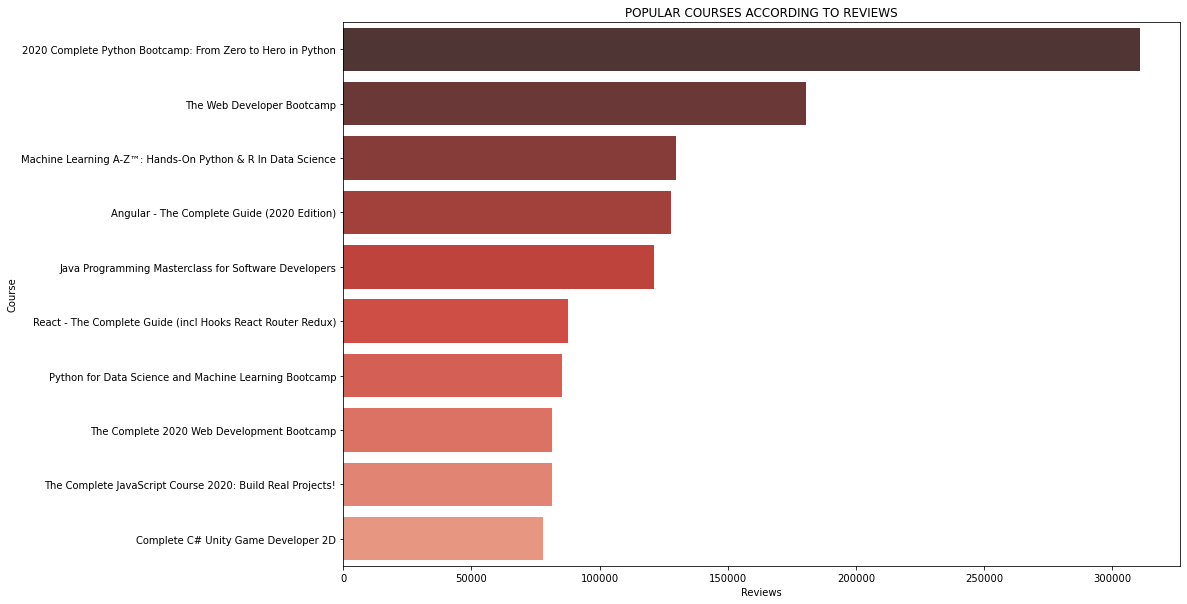

In [21]:
y=top_reviews['Title'].values
x=top_reviews['Reviews'].values
plt.figure(figsize=(15,10))
sns.barplot(x,y,palette='Reds_d')
plt.xlabel('Reviews')
plt.ylabel('Course')
plt.title('POPULAR COURSES ACCORDING TO REVIEWS')

In [23]:
(udemy.groupby("Title")[["Subscribers", "Reviews"]].sum().sort_values("Reviews", ascending= False)).head(10)

,Subscribers,Reviews
Title,,
2020 Complete Python Bootcamp: From Zero to Hero in Python,1078402,310816
The Web Developer Bootcamp,589105,180491
Machine Learning A-Z™: Hands-On Python & R In Data Science,683343,129964
Angular - The Complete Guide (2020 Edition),414247,127686
Java Programming Masterclass for Software Developers,493389,121070
React - The Complete Guide (incl Hooks React Router Redux),294927,87677
Python for Data Science and Machine Learning Bootcamp,379836,85213
The Complete 2020 Web Development Bootcamp,253974,81429
The Complete JavaScript Course 2020: Build Real Projects!,340221,81331


As the number one course is "2020 Complete Python Bootcamp: From Zero to Hero in Python" according to both "Subcribers" & "Reviews". Thus, number of reviews influences a prospective customer's decision to by the course.

In [24]:
top_rating = udemy[['Title','Rating']].sort_values(by='Rating', ascending=False).head(20)
print(top_rating)

                                                  Title   Rating
5973  Elementor -  Make Amazing WordPress Pages With...  5.00000
9840  iOS 7 Option Screens for UIView or Sprite Kit ...  5.00000
7027      Create IOS Applications Using Parse and Swift  5.00000
3410     Build Instagram to Master Swift 4 and Firebase  5.00000
3426               Build awesome web apps using Angular  5.00000
9295  Python Practice Test MCQ Certified: Go from 0 ...  5.00000
1933  Personnel Success: Life Purpose/ Goal Achievem...  5.00000
6607  Fullstack Node.js and Express Bootcamp with Re...  5.00000
9675  Develop A Covid-19 Live Web App With Python Dj...  5.00000
9793     Game Audio 101: How to Create Sounds for Games  4.98549
9790     Game Audio 101: How to Create Sounds for Games  4.98549
4980  The Complete Guide to the Best 200 WordPress P...  4.98477
7591  Python 3 Network Programming (Sequel) - Build ...  4.97053
7747  Byte-Sized-Chunks: Stacks Queues Binary Trees ...  4.97018
9007  SQL database founda

In [25]:
top_price = udemy[['Title','Price']].sort_values(by='Price', ascending=False).head(20)
print(top_price)

                                                  Title  Price
8538  How to Become a Software QA Tester. Roman Savi...  12800
9401                                 Coding Foundations  12800
6517      Learn SQL From Scratch No Experience Required  12800
2814  Complete In & Out Of Ethereum Blockchain Solid...  12800
9938  RPA Developer Training & Certification - Autom...  12800
3780    IBM Datastage For Administrators and Developers  12800
6834  Salesforce Lightning Components Development Tu...  12800
6455  Modern Artificial Intelligence Masterclass: Bu...  12800
4601             Intro to Coding: HTML CSS & JavaScript  12800
1974  PyTorch: Deep Learning and Artificial Intellig...  12800
1205   Complete Guide To Making Apps: 250000+ Downloads  12480
1023  Full stack Universal React with Redux Node js ...  12480
8571  Learn Basic Microsoft Razor with JQuery and Vi...  11200
6800  Learn JavaScript Through Microsoft Visual Stud...  10880
6796  Learn JavaScript Through Microsoft Visual Stud...

# Relationship between numerical columns

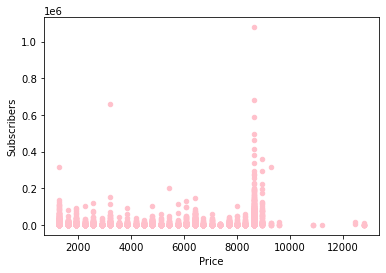

In [26]:
udemy.plot(kind = 'scatter', x = 'Price', y = 'Subscribers', color = 'pink')
plt.xlabel('Price')
plt.ylabel('Subscribers')
plt.show()

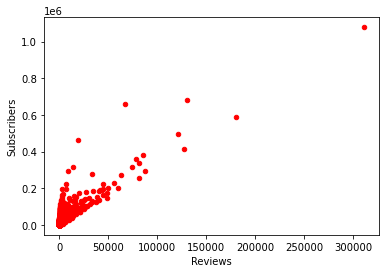

In [27]:
udemy.plot(kind = 'scatter', x = 'Reviews', y = 'Subscribers', color = 'red')
plt.xlabel('Reviews')
plt.ylabel('Subscribers')
plt.show()

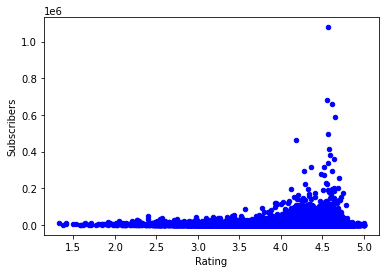

In [28]:
udemy.plot(kind = 'scatter', x = 'Rating', y = 'Subscribers', color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Subscribers')
plt.show()

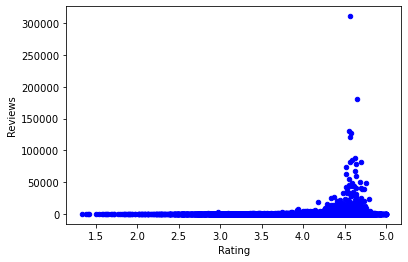

In [29]:
udemy.plot(kind = 'scatter', x = 'Rating', y = 'Reviews', color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

In [30]:
udemy0=udemy.copy()
udemy0['Published'] = pd.to_datetime(udemy['Published'])
udemy0['Published_date'] = udemy0['Published'].dt.date
udemy0['Published_year'] = pd.DatetimeIndex(udemy0['Published']).year

In [31]:
udemy0[['Published_year','Title']].groupby(['Published_year']).count()

,Title
Published_year,
2011,15
2012,55
2013,217
2014,422
2015,875
2016,1251
2017,1730
2018,2378
2019,2000


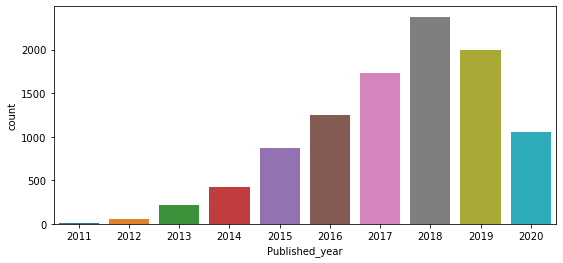

In [32]:
plt.figure(figsize = (9,4))
sns.countplot(data = udemy0, x = 'Published_year')
plt.show()